In [1]:
# import necessary libraries
import os
import torch 
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import pickle



from pathlib import Path


CANDIDATES = [
    
    Path(r"C:\Users\tom\Desktop\Repository"),
    Path(r"C:\Users\Chen\Desktop\Repository"),
    Path(r"/Users/vvvp./Desktop"),
]
searchpaths = [p for p in CANDIDATES if p.exists()]

#tuple of repos
repos = ('machine_learning_library',)





import sys
import os
# In Jupyter notebooks, __file__ is not defined. Use the current working directory instead.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import repo_tools
repo_tools.repos_path_finder(searchpaths, repos)
from spnc import spnc_anisotropy
import spnc_ml as ml
from deterministic_mask import fixed_seed_mask, max_sequences_mask

from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from datasets.load_TI46_digits import *
import datasets.load_TI46 as TI46
from sklearn.metrics import classification_report
from formal_Parameter_Dynamics_Preformance import *


In [2]:
# 构建储层对象
class ReservoirParams:
    def __init__(self, **kwargs):
            # Reservoir parameters 
            self.h = 0.4
            self.theta_H = 90
            self.k_s_0 = 0
            self.phi = 45
            self.beta_prime = 35.13826524755751

            # Network parameters 
            self.Nvirt = 50
            self.m0 = 0.005288612874870094
            self.bias = True
            self.Nwarmup = 0
            self.verbose_repr = False

            self.params = {
                'theta': 0.34142235979698393,
                'gamma': 0.069274461903986,
                'delay_feedback': 0,
                'Nvirt': self.Nvirt,
                'length_warmup': self.Nwarmup,
                'warmup_sample': self.Nwarmup * self.Nvirt,
                'voltage_noise': False,
                'seed_voltage_noise': 1234,
                'delta_V': 0.1,
                'johnson_noise': False,
                'seed_johnson_noise': 1234,
                'mean_johnson_noise': 0.0000,
                'std_johnson_noise': 0.00001,
                'thermal_noise': False,
                'seed_thermal_noise': 1234,
                'lambda_ou': 1.0,
                'sigma_ou': 0.1
        }

            for key in ['h', 'theta_H', 'k_s_0', 'phi', 'beta_prime', 'Nvirt', 'm0', 'bias', 'Nwarmup']:
                if key in kwargs:
                    setattr(self, key, kwargs[key])

            
            if 'params' in kwargs and isinstance(kwargs['params'], dict):
                self.params.update(kwargs['params'])

    
    def update_params(self, **kwargs):
        for key, value in kwargs.items():
            if hasattr(self, key):
                setattr(self, key, value)
            if key in self.params:
                self.params[key] = value
            if not hasattr(self, key) and key not in self.params:
                raise AttributeError(f"ReservoirParams has no attribute or param key '{key}'")
            
    def print_params(self, verbose=False):
        if not verbose:
            print(f"ReservoirParams(h={self.h}, beta_prime={self.beta_prime}, Nvirt={self.Nvirt})")
        else:
            print(f"ReservoirParams detailed info:")
            print(f"  h = {self.h}")
            print(f"  theta_H = {self.theta_H}")
            print(f"  k_s_0 = {self.k_s_0}")
            print(f"  phi = {self.phi}")
            print(f"  beta_prime = {self.beta_prime}")
            print(f"  Nvirt = {self.Nvirt}")
            print(f"  m0 = {self.m0}")
            print(f"  bias = {self.bias}")
            print("  params dictionary:")
            for k, v in self.params.items():
                print(f"    {k}: {v}")

0.4611114453425702
Seed Training: 1234
len(x_train): 5000
error with zero =  0.03705547593816419
              precision    recall  f1-score   support

           0      0.935     0.954     0.944       479
           1      0.864     0.982     0.919       563
           2      0.925     0.830     0.875       488
           3      0.892     0.890     0.891       493
           4      0.859     0.897     0.878       535
           5      0.910     0.843     0.876       434
           6      0.894     0.956     0.924       501
           7      0.908     0.920     0.914       550
           8      0.890     0.825     0.856       462
           9      0.871     0.808     0.839       495

    accuracy                          0.893      5000
   macro avg      0.895     0.891     0.892      5000
weighted avg      0.894     0.893     0.892      5000



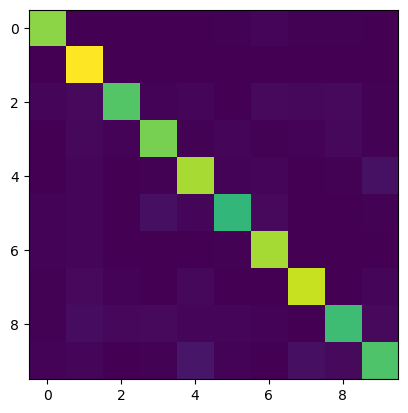

              precision    recall  f1-score   support

           0      0.952     0.941     0.947        85
           1      0.827     0.984     0.899       126
           2      0.933     0.724     0.816       116
           3      0.859     0.794     0.825       107
           4      0.769     0.845     0.805       110
           5      0.812     0.747     0.778        87
           6      0.804     0.897     0.848        87
           7      0.800     0.808     0.804        99
           8      0.753     0.685     0.718        89
           9      0.745     0.777     0.760        94

    accuracy                          0.823      1000
   macro avg      0.825     0.820     0.820      1000
weighted avg      0.827     0.823     0.822      1000



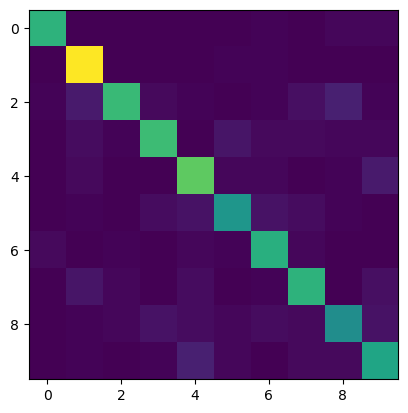

In [3]:
params_bestMC = ReservoirParams(
        h=0.4, m0=0.008, Nvirt=200, beta_prime=	50.0,
        params={'theta': 0.1564938388583194, 'gamma': 0.04608425844940916, 'Nvirt': 200}
    )
# params = ReservoirParams()

spn_bestMC = spnc_anisotropy(
        params_bestMC.h,
        params_bestMC.theta_H,
        params_bestMC.k_s_0,
        params_bestMC.phi,
        params_bestMC.beta_prime,
        restart=True
    )

# transform = spn.gen_signal_slow_delayed_feedback
transform_MC = spn_bestMC.gen_signal_slow_delayed_feedback

ml.spnc_MNIST(params_bestMC.Nvirt, params_bestMC.m0, params_bestMC.bias, transform_MC, params_bestMC.params)

0.46113400221078005
Seed Training: 1234
len(x_train): 5000
error with zero =  0.05979090376813295
              precision    recall  f1-score   support

           0      0.854     0.937     0.894       479
           1      0.707     0.975     0.820       563
           2      0.871     0.705     0.779       488
           3      0.774     0.813     0.793       493
           4      0.773     0.880     0.823       535
           5      0.868     0.500     0.635       434
           6      0.817     0.908     0.860       501
           7      0.807     0.882     0.843       550
           8      0.834     0.697     0.759       462
           9      0.861     0.665     0.750       495

    accuracy                          0.804      5000
   macro avg      0.817     0.796     0.796      5000
weighted avg      0.814     0.804     0.799      5000



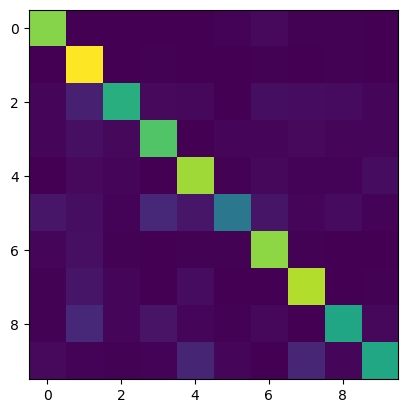

              precision    recall  f1-score   support

           0      0.898     0.929     0.913        85
           1      0.703     0.960     0.812       126
           2      0.861     0.586     0.697       116
           3      0.741     0.748     0.744       107
           4      0.727     0.845     0.782       110
           5      0.683     0.471     0.558        87
           6      0.712     0.851     0.775        87
           7      0.733     0.778     0.755        99
           8      0.734     0.652     0.690        89
           9      0.792     0.649     0.713        94

    accuracy                          0.752      1000
   macro avg      0.758     0.747     0.744      1000
weighted avg      0.758     0.752     0.746      1000



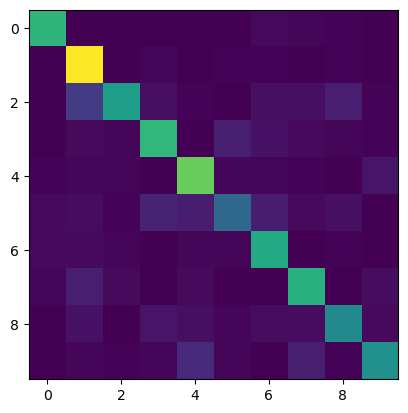

In [4]:
params_bestCQ = ReservoirParams(
        h=0.4, m0=0.006937322149792008, Nvirt=200, beta_prime=27.251620432439488,
        params={'theta': 0.01, 'gamma': 0.3663969812988086, 'Nvirt': 200}
    )

spn_bestCQ = spnc_anisotropy(
        params_bestCQ.h,
        params_bestCQ.theta_H,
        params_bestCQ.k_s_0,
        params_bestCQ.phi,
        params_bestCQ.beta_prime,
        restart=True
    )

# transform = spn.gen_signal_slow_delayed_feedback
transform_CQ = spn_bestCQ.gen_signal_slow_delayed_feedback

ml.spnc_MNIST(params_bestCQ.Nvirt, params_bestCQ.m0, params_bestCQ.bias, transform_CQ, params_bestCQ.params)